In [1]:
import numpy as np
import os
import errno
import sys
import cv2

def read_images(path, sz=None):
  c = 0
  X, y = [], []

  for dirname, dirnames, filenames in os.walk(path):
    for subdirname in dirnames:
      subject_path = os.path.join(dirname, subdirname)
      for filename in os.listdir(subject_path):
        try:
          if(filename == ".directory"):
            continue
          filepath = os.path.join(subject_path, filename)
          im = cv2.imread(os.path.join(subject_path, filename), cv2.IMREAD_GRAYSCALE)

          # Resize the images to the prescribed size
          if (sz is not None):
            im = cv2.resize(im, (200,200))

          X.append(np.asarray(im, dtype=np.uint8))
          y.append(c)

        except IOError as e:
          print(f"I/O Error({e.errno}): {e.strerror}")
        except:
          print("Unexpected error:", sys.exc_info()[0])
          raise
      c = c+1
  return [X, y]

## Face Recognition Code

Referenced from the facial recognition activity previously.

In [2]:
import sys
import numpy as np
import cv2

def face_rec():
    names = ['Nil', 'Em', 'Iris', 'Dan', 'Jai'] # Put your names here for faces to recognize
#     if len(sys.argv) < 2:
#          print("USAGE: facerec_demo.py </path/to/images> [</path/to/store/images/at>]")
#          sys.exit()
        
    print("Reading images...")
    [X, y] = read_images(r'C:\Users\admin\Downloads\face recognition', sz=(200, 200))

    
    print("Size of X:", len(X))
    print("Size of y:", len(y))
    print("Labels:", y)
    
    y = np.asarray(y, dtype=np.int32)
    
    model = cv2.face.FisherFaceRecognizer_create()
    #model = cv2.face.createLBPHFaceRecognizer()
    #model = cv2.face.LBPHFaceRecognizer_create()
    #model = cv2.face.EigenFaceRecognizer_create()
    #model = recognizer 
    model.train(X, y)

    camera = cv2.VideoCapture(0)
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

    while True:
        ret, img = camera.read()
        if not ret:
            break

        faces = face_cascade.detectMultiScale(img, 1.3, 5)

        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            gray = cv2.cvtColor(img[y:y + h, x:x + w], cv2.COLOR_BGR2GRAY)
            roi = cv2.resize(gray, (200, 200), interpolation=cv2.INTER_LINEAR)

            try:
                params = model.predict(roi)
                label = names[params[0]]
                cv2.putText(img, label, (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
            except:
                continue

        cv2.imshow("camera", img)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    camera.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    face_rec()

Reading images...
Size of X: 67
Size of y: 67
Labels: [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


In [ ]:
pip install deepface

## Mood Detection using DeepFace library

In [11]:
# Import necessary libraries
import cv2
import numpy as np
from deepface import DeepFace

# Load DEEPFACE model
model = DeepFace.build_model('Emotion')

# Define emotion labels
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

# Start capturing video
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    # Resize frame
    resized_frame = cv2.resize(frame, (48, 48), interpolation=cv2.INTER_AREA)
    
    # Preprocess the image for DEEPFACE
    img = resized_frame.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)
    
    # Predict emotions using DEEPFACE
    preds = model.predict(img)
    emotion_idx = np.argmax(preds)
    emotion = emotion_labels[emotion_idx]
    
    # Draw rectangle around face and label with predicted emotion
    cv2.rectangle(frame, (0, 0), (200, 30), (0, 0, 0), -1)
    cv2.putText(frame, emotion, (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    
    # Display the resulting frame
    cv2.imshow('Real-time Emotion Detection', frame)
    
    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close all windows
cap.release()
cv2.destroyAllWindows()

## Implementing two models to produce facial recognition and mood detector output

In [13]:
import sys
import numpy as np
import cv2
from deepface import DeepFace

    
def face_rec():
    names = ['Nil', 'Em', 'Iris', 'Dan', 'Jai'] # Put your names here for faces to recognize
#     if len(sys.argv) < 2:
#          print("USAGE: facerec_demo.py </path/to/images> [</path/to/store/images/at>]")
#          sys.exit()
      # Load DEEPFACE model
    model = DeepFace.build_model('Emotion')

    # Define emotion labels
    emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']    
  
    print("Reading images...")
    [X, y] = read_images(r'C:\Users\admin\Downloads\face recognition', sz=(200, 200))

    
    print("Size of X:", len(X))
    print("Size of y:", len(y))
    print("Labels:", y)
    
    y = np.asarray(y, dtype=np.int32)
    
    #model = cv2.face.FisherFaceRecognizer_create()
    #model = cv2.face.createLBPHFaceRecognizer()
    #model = cv2.face.LBPHFaceRecognizer_create()
    model = cv2.face.EigenFaceRecognizer_create()
    #model = recognizer 
    model.train(X, y)

    camera = cv2.VideoCapture(0)
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

    while True:
        ret, img = camera.read()
        #resized_frame = cv2.resize(camera, (48, 48), interpolation=cv2.INTER_AREA)
        if not ret:
            break

        faces = face_cascade.detectMultiScale(img, 1.3, 5)

        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            gray = cv2.cvtColor(img[y:y + h, x:x + w], cv2.COLOR_BGR2GRAY)
            roi = cv2.resize(gray, (200, 200), interpolation=cv2.INTER_LINEAR)
            # Preprocess the image for DEEPFACE
            img_mood = roi.astype('float32') / 255.0
            img_mood = np.expand_dims(img_mood, axis=0)

            try:
                
                params = model.predict(roi)
                label = names[params[0]]
                preds = model.predict(img_mood)
                emotion_idx = np.argmax(preds)
                emotion = emotion_labels[emotion_idx]
                cv2.putText(img, label, emotion (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
            except:
                continue

        cv2.imshow("camera", img)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    camera.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    face_rec()

c:\Users\admin\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"



Reading images...
Size of X: 67
Size of y: 67
Labels: [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


## Testing the performance of the model

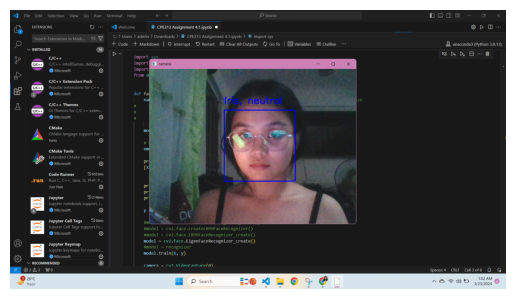

In [28]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

path_neutral = r"C:\Users\admin\Pictures\Screenshots\Screenshot 2024-03-23 010250.png"
neutral = mpimg.imread(path_neutral)
plt.imshow(neutral)
plt.axis('off')
plt.show()

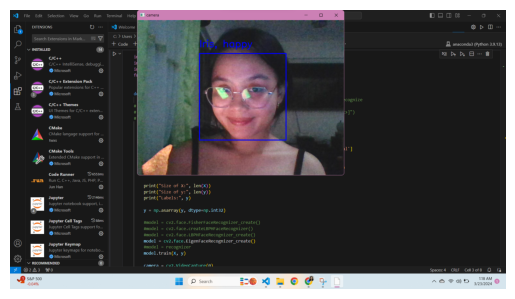

In [29]:
path_happy = r"C:\Users\admin\Pictures\Screenshots\Screenshot 2024-03-23 011853.png"
happy = mpimg.imread(path_happy)
plt.imshow(happy)
plt.axis('off')
plt.show()